1
0
69889
69889
69889
1
1
1.14103


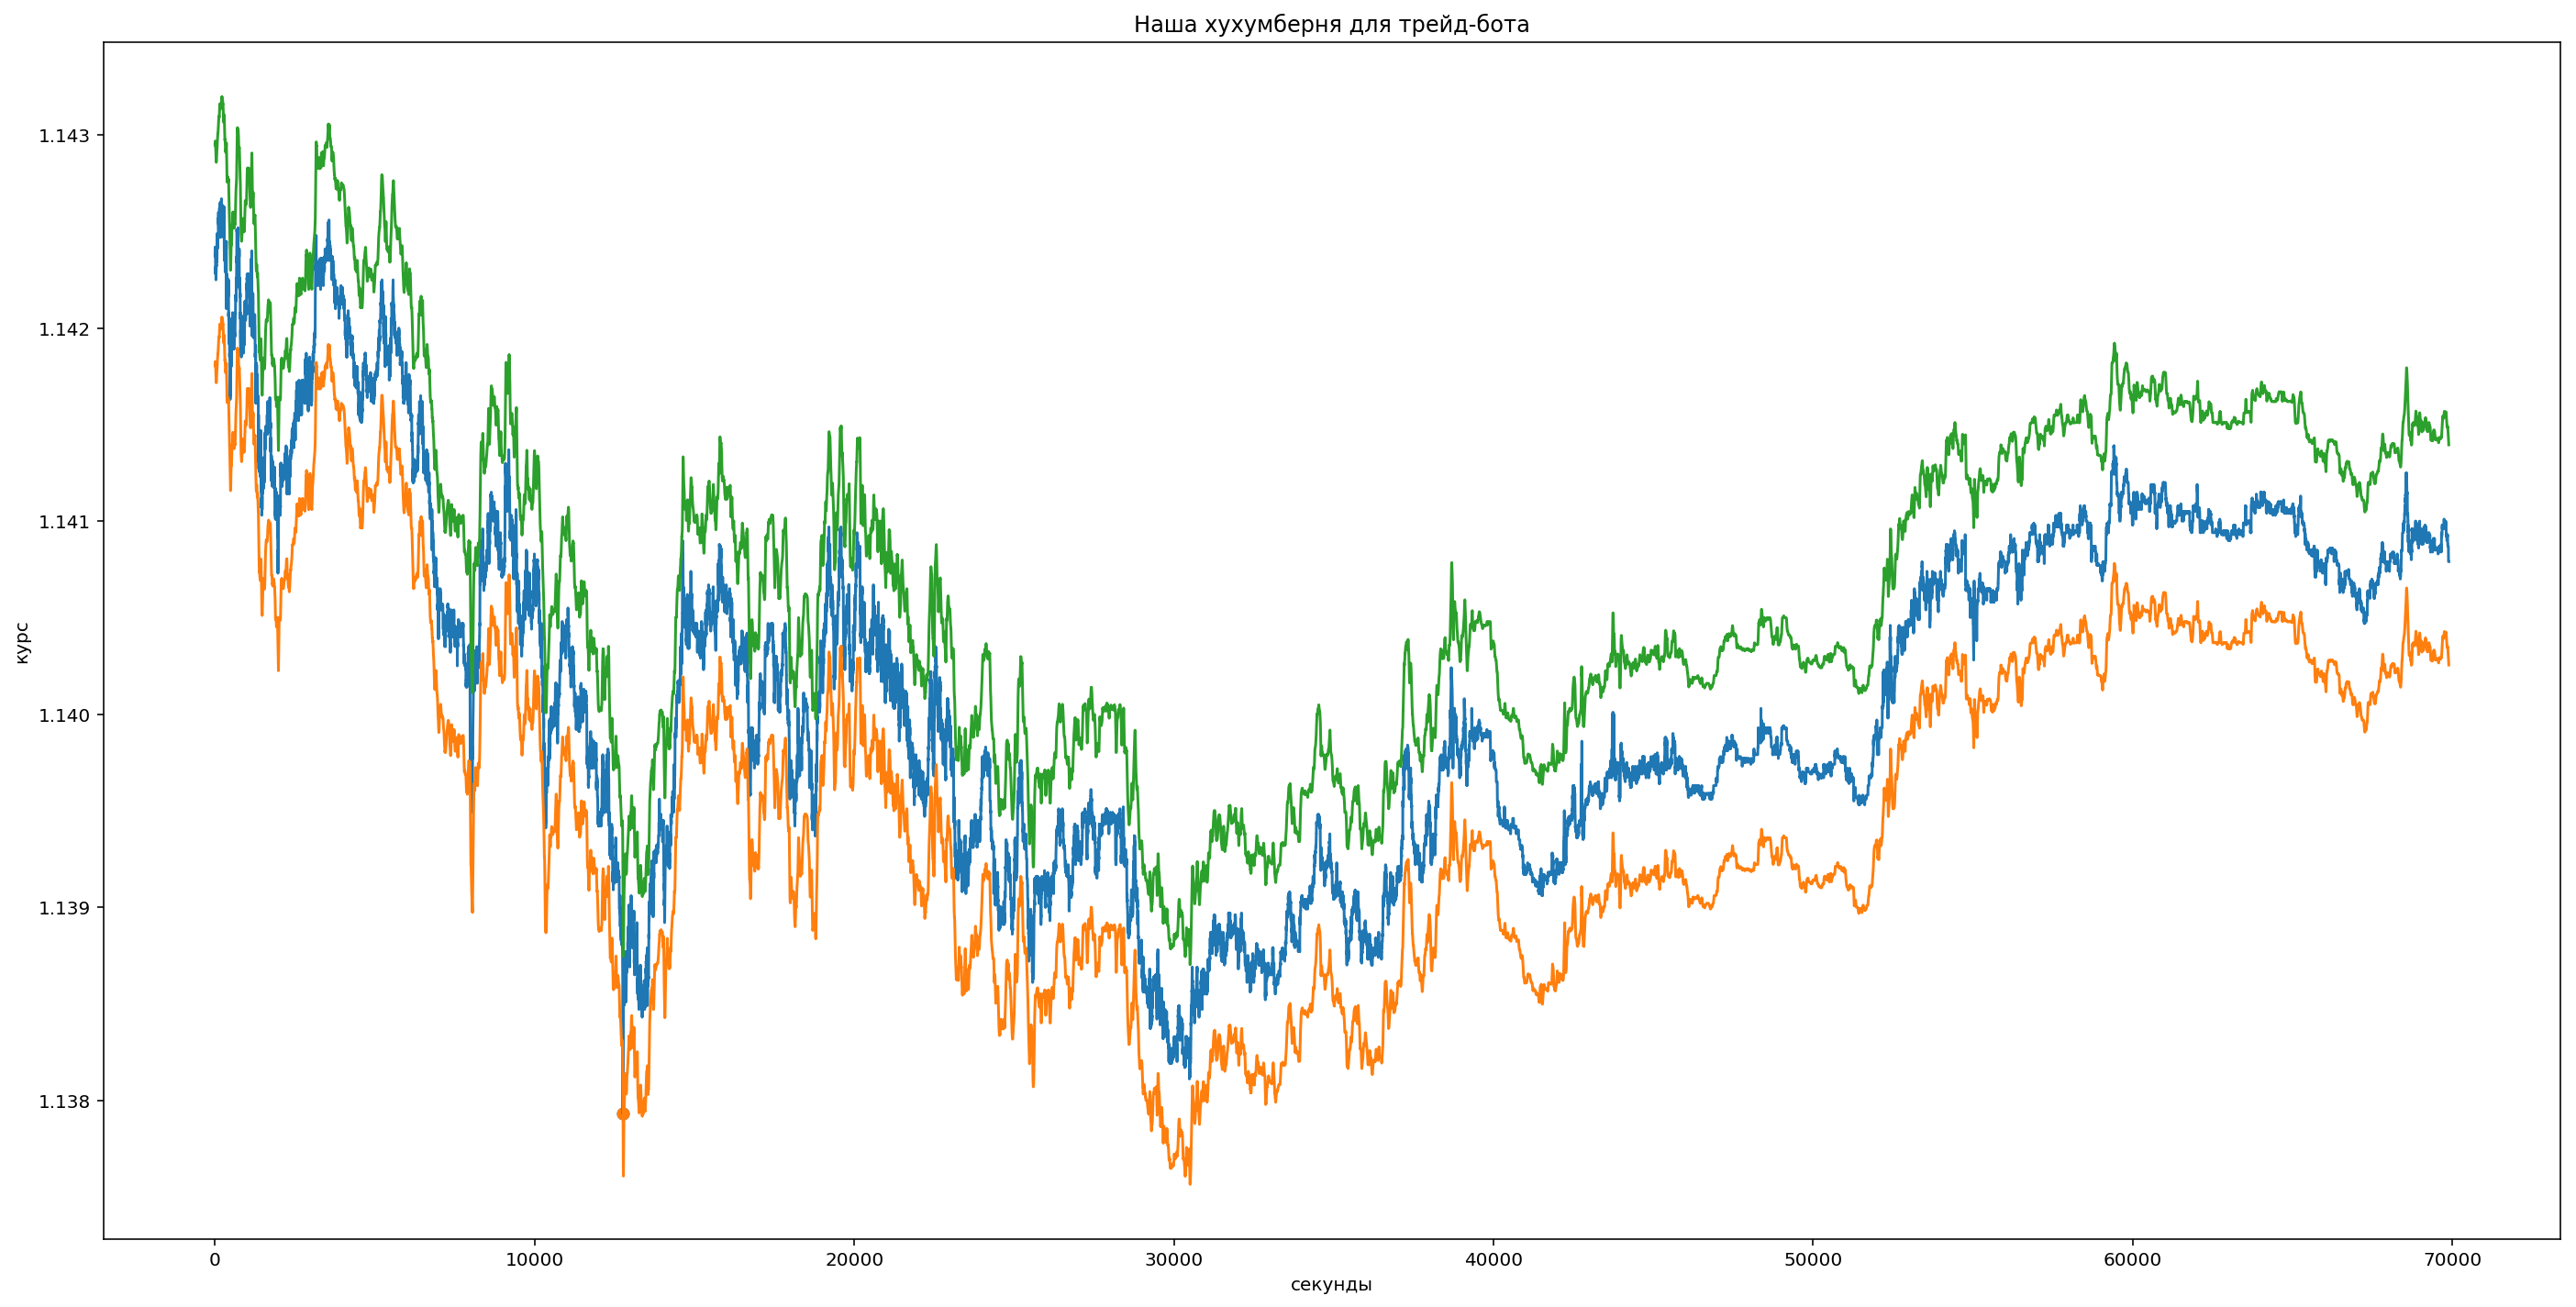

IndexError: index 69900 is out of bounds for axis 0 with size 69889

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

a = []
work_np = []
i = 0
j = 0
fi = 0
indexinger = 0
stavka = 0
stroka = ''
koridor = np.array([])
sr_zn_kor = np.array([])
sr_zn_kor_min = np.array([])
sr_zn_kor_max = np.array([])
prob_kor = np.array([])
our_index = np.array([])
uspech_stavki = np.array([])
neuspech_stavki = np.array([])
our_uspech_index = np.array([])
mnenie_mass = np.array([])
dinamika_mass = np.array([])
mass = []
is_stavka = False
stavka_vverh = False
stavka_vniz = False
our_ti = 20
our_kor_len = 20
our_test_znach = 180
first = 0
last = 300
sum_usp=0
sum_neusp=0

f = open('OlimpGrafik2.txt')
for line in f:
    line = line.replace('\n', '')
    mass.append([line.split(': ')])

mass = np.array(mass)

mass_mod = mass[:,0][:,1]
mnenie_mass = mass[:,0][:,2]

mass_mod = np.array(mass_mod, dtype=float)
mnenie_mass = np.array(mnenie_mass, dtype=int)


last = len(mnenie_mass)

mnenie_mass = mnenie_mass
viborka = mass_mod

while our_ti<(our_ti+our_test_znach):

        while our_kor_len<(our_kor_len+our_test_znach):

            for stroka in viborka:

                if indexinger%our_ti == 0:
                    dinamika = stroka-viborka[indexinger-our_ti]
                    if dinamika<0:
                        dinamika_mass = np.append(dinamika_mass, dinamika*(-1))
                    else:
                        dinamika_mass = np.append(dinamika_mass, dinamika)

                    if len(dinamika_mass)>our_ti:
                        dinamika_mass = np.delete(dinamika_mass, 0)
                    #print('Динамика : '+str(dinamika))

                koridor = np.append(koridor, stroka)
                sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
                dinamika_mean = np.mean(dinamika_mass)
                
                dinamika_mean = 1.00050

                sr_zn_kor_min = np.append(sr_zn_kor_min, (np.mean(koridor)/dinamika_mean))
                sr_zn_kor_max = np.append(sr_zn_kor_max, (np.mean(koridor)*dinamika_mean))

                if len(koridor)>our_kor_len:
                    koridor = np.delete(koridor, 0)

                if len(prob_kor)==0:
                    per_pk = stroka
                else:
                    per_pk = prob_kor[len(prob_kor)-1]

                if stroka>sr_zn_kor_max[indexinger]:
                    if stavka == 0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vverh = True

                elif stroka<sr_zn_kor_min[indexinger]:
                    if stavka == 0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vniz = True

                if stavka>0:
                    stavka-=1

                if is_stavka == True and stavka == 0:
                    if stavka_vverh == True:
                        if per_pk>stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk<stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vverh = False
                    elif stavka_vniz == True:
                        if per_pk<stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk>stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vniz = False
                    is_stavka = False


                indexinger+=1

            print(len(uspech_stavki))
            print(len(neuspech_stavki))
            print(len(sr_zn_kor))
            print(len(viborka))
            print(len(sr_zn_kor_min))
            print(len(prob_kor))
            print(len(our_index))
            print(mass_mod[1848+60])

            plt.plot(mass_mod[first:last])
            plt.plot(sr_zn_kor_min)
            plt.plot(sr_zn_kor_max)
            plt.scatter(our_index,prob_kor)
            plt.scatter(our_uspech_index,uspech_stavki)
            plt.xlabel('секунды')
            plt.ylabel('курс')
            plt.title('Наша хухумберня для трейд-бота')
            fig_size = plt.rcParams["figure.figsize"]
            fig_size[0] = 24
            fig_size[1] = 12
            plt.rcParams["figure.figsize"] = fig_size
            plt.rcParams["figure.dpi"] = 144.0
            plt.show()
        

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random


def f_ot_vib(viborka, our_ti, our_kor_len, indexinger, mnenie_mass, first, last):
    
            koridor = np.array([])
            sr_zn_kor = np.array([])
            sr_zn_kor_min = np.array([])
            sr_zn_kor_max = np.array([])
            dinamika_mass = np.array([])
            prob_kor = np.array([])
            stavka = 0
            is_stavka = False
            stavka_vverh = False
            stavka_vniz = False
        
            for stroka in viborka:

                if indexinger%our_ti == 0:
                    dinamika = stroka-viborka[indexinger-our_ti]
                    if dinamika<0:
                        dinamika_mass = np.append(dinamika_mass, dinamika*(-1))
                    else:
                        dinamika_mass = np.append(dinamika_mass, dinamika)

                    if len(dinamika_mass)>our_ti:
                        dinamika_mass = np.delete(dinamika_mass, 0)
                    #dinamika = 1.000119
                    #print('Динамика : '+str(dinamika))

                koridor = np.append(koridor, stroka)
                sr_zn_kor = np.append(sr_zn_kor, np.mean(koridor))
                dinamika_mean = np.mean(dinamika_mass)

                sr_zn_kor_min = np.append(sr_zn_kor_min, (np.mean(koridor)-dinamika_mean))
                sr_zn_kor_max = np.append(sr_zn_kor_max, (np.mean(koridor)+dinamika_mean))

                if len(koridor)>our_kor_len:
                    koridor = np.delete(koridor, 0)

                if len(prob_kor)==0:
                    per_pk = stroka
                else:
                    per_pk = prob_kor[len(prob_kor)-1]

                if stroka>sr_zn_kor_max[indexinger]:
                    if stavka == 0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vverh = True

                elif stroka<sr_zn_kor_min[indexinger]:
                    if stavka == 0:
                        prob_kor = np.append(prob_kor, stroka)
                        our_index = np.append(our_index, indexinger)
                        stavka = 60
                        is_stavka = True
                        stavka_vniz = True

                if stavka>0:
                    stavka-=1

                if is_stavka == True and stavka == 0:
                    if stavka_vverh == True:
                        if per_pk>stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk<stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vverh = False
                    elif stavka_vniz == True:
                        if per_pk<stroka:
                            uspech_stavki = np.append(uspech_stavki, per_pk)
                            our_uspech_index = np.append(our_uspech_index, indexinger-59)
                        if per_pk>stroka:
                            neuspech_stavki = np.append(neuspech_stavki, per_pk)
                        stavka_vniz = False
                    is_stavka = False


                indexinger+=1

a = []
work_np = []
i = 0
j = 0
fi = 0
indexinger = 0
stavka = 0
stroka = ''
koridor = np.array([])
sr_zn_kor = np.array([])
sr_zn_kor_min = np.array([])
sr_zn_kor_max = np.array([])
prob_kor = np.array([])
our_index = np.array([])
uspech_stavki = np.array([])
neuspech_stavki = np.array([])
our_uspech_index = np.array([])
mnenie_mass = np.array([])
dinamika_mass = np.array([])
effec = np.array([])
effec_one_par = np.array([])
effec_two_par = np.array([])
effeccy_of_our_model = np.array([])
effec_one_par_model = np.array([])
effec_two_par_model = np.array([])
mass = []
is_stavka = False
stavka_vverh = False
stavka_vniz = False
our_ti = 1
our_kor_len = 1
our_test_znach = 180
first = 0
last = 300
sum_usp=0
sum_neusp=0

f = open('OlimpGrafik2.txt')
for line in f:
    line = line.replace('\n', '')
    mass.append([line.split(': ')])

mass = np.array(mass)

mass_mod = mass[:,0][:,1]
mnenie_mass = mass[:,0][:,2]

mass_mod = np.array(mass_mod, dtype=float)
mnenie_mass = np.array(mnenie_mass, dtype=int)


#last = len(mnenie_mass)

mnenie_mass = mnenie_mass
viborka = mass_mod


while last<len(mass_mod):
    
    mnenie_mass = mnenie_mass[first:last]
    viborka = mass_mod[first:last]

    while our_ti<(our_test_znach):

            while our_kor_len<(our_test_znach):

                f_ot_vib(viborka, our_ti, our_kor_len, indexinger, mnenie_mass, first, last)
                
            if len(prob_kor)>0:
                effec = np.append(effec, (len(uspech_stavki)/len(prob_kor)*100))
                effec_one_par = np.append(effec, our_ti)
                effec_two_par = np.append(effec, our_kor_len)
            else:
                effec = np.append(effec, 0)
                effec_one_par = np.append(effec, our_ti)
                effec_two_par = np.append(effec, our_kor_len)
                
            if our_kor_len==(our_test_znach-1):
                effeccy_of_our_model = np.append(effeccy_of_our_model, np.max(effec))
                idx = np.where(effec == np.max(effec))
                effec_one_par_model = (effec_one_par_model, effec_one_par[idx])
                effec_two_par_model = (effec_two_par_model, effec_two_par[idx])
                
                print(len(uspech_stavki))
                print(len(neuspech_stavki))
                print(len(sr_zn_kor))
                print(len(viborka))
                print(len(sr_zn_kor_min))
                print(len(prob_kor))
                print(len(our_index))
                print(mass_mod[1848+60])

                plt.plot(mass_mod[first:last])
                plt.plot(sr_zn_kor_min)
                plt.plot(sr_zn_kor_max)
                plt.scatter(our_index,prob_kor)
                plt.scatter(our_uspech_index,uspech_stavki)
                plt.xlabel('секунды')
                plt.ylabel('курс')
                plt.title('Наша хухумберня для трейд-бота')
                fig_size = plt.rcParams["figure.figsize"]
                fig_size[0] = 24
                fig_size[1] = 12
                plt.rcParams["figure.figsize"] = fig_size
                plt.rcParams["figure.dpi"] = 144.0
                plt.show()

            sum_usp+=len(uspech_stavki)
            sum_neusp+=len(neuspech_stavki)
            indexinger = 0
            stavka = 0
            stroka = ''
            koridor = np.array([])
            sr_zn_kor = np.array([])
            sr_zn_kor_min = np.array([])
            sr_zn_kor_max = np.array([])
            prob_kor = np.array([])
            our_index = np.array([])
            uspech_stavki = np.array([])
            neuspech_stavki = np.array([])
            our_uspech_index = np.array([])
            mnenie_mass = np.array([])
            dinamika_mass = np.array([])
            effec = np.array([])
            effec_one_par = np.array([])
            effec_two_par = np.array([])
            mass = []
            is_stavka = False
            stavka_vverh = False
            stavka_vniz = False

            our_kor_len+=1
            
            our_ti+=1
            our_kor_len = 0
            print(our_ti)
        
    
    first+=300
    last+=300
    our_ti= 0

KeyboardInterrupt: 

In [ ]:
                print(len(uspech_stavki))
                print(len(neuspech_stavki))
                print(len(sr_zn_kor))
                print(len(viborka))
                print(len(sr_zn_kor_min))
                print(len(prob_kor))
                print(len(our_index))

                plt.plot(mass_mod[first:last])
                plt.plot(sr_zn_kor_min)
                plt.plot(sr_zn_kor_max)
                plt.scatter(our_index,prob_kor)
                plt.scatter(our_uspech_index,uspech_stavki)
                plt.xlabel('секунды')
                plt.ylabel('курс')
                plt.title('Наша хухумберня для трейд-бота')
                fig_size = plt.rcParams["figure.figsize"]
                fig_size[0] = 24
                fig_size[1] = 12
                plt.rcParams["figure.figsize"] = fig_size
                plt.rcParams["figure.dpi"] = 144.0
                plt.show()

                sum_usp+=len(uspech_stavki)
                sum_neusp+=len(neuspech_stavki)
                sum_stavok = sum_usp+sum_neusp